In [20]:
import torch
x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

In [21]:
W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0

for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
    cost = torch.mean(-y_train * torch.log(hypothesis) - (1 - y_train) * torch.log(1 - hypothesis))

    cost.backward()
    with torch.no_grad() as grd:
        W = W - lr * W.grad
        b = b - lr * b.grad

    if epoch % 300 == 0:
        print('epoch: {}, cost: {:.6f}, W {:.6f}, b: {:.6f}'.format(epoch, cost.item(), W.squeeze(), b.squeeze()))

epoch: 0, cost: 0.693147, W -0.154167, b: 0.083333
epoch: 300, cost: 0.390820, W -2.174322, b: 6.609554
epoch: 600, cost: 0.383699, W -2.620780, b: 7.953166
epoch: 900, cost: 0.382149, W -2.832521, b: 8.587363
epoch: 1200, cost: 0.381706, W -2.946402, b: 8.927781
epoch: 1500, cost: 0.381565, W -3.010969, b: 9.120601
epoch: 1800, cost: 0.381517, W -3.048561, b: 9.232802
epoch: 2100, cost: 0.381500, W -3.070766, b: 9.299055
epoch: 2400, cost: 0.381494, W -3.083992, b: 9.338511
epoch: 2700, cost: 0.381492, W -3.091908, b: 9.362126
epoch: 3000, cost: 0.381491, W -3.096662, b: 9.376306


In [22]:
x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]])


In [23]:
W = torch.zeros(1,1)
b = torch.zeros(1,1)
optimizer = torch.optim.SGD([W, b], lr=1.0)

for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
    cost = torch.mean(-y_train * torch.log(hypothesis) - (1 - y_train) * torch.log(1 - hypothesis))

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 300 == 0:
        print('epoch: {}, cost: {:.6f}, W {:.6f}, b: {:.6f}'.format(epoch, cost.item(), W.squeeze(), b.squeeze()))


epoch: 0, cost: 0.693147, W -0.154167, b: 0.083333
epoch: 300, cost: 0.390820, W -2.174322, b: 6.609554
epoch: 600, cost: 0.383699, W -2.620780, b: 7.953166
epoch: 900, cost: 0.382149, W -2.832521, b: 8.587363
epoch: 1200, cost: 0.381706, W -2.946402, b: 8.927781
epoch: 1500, cost: 0.381565, W -3.010969, b: 9.120601
epoch: 1800, cost: 0.381517, W -3.048561, b: 9.232802
epoch: 2100, cost: 0.381500, W -3.070766, b: 9.299055
epoch: 2400, cost: 0.381494, W -3.083992, b: 9.338511
epoch: 2700, cost: 0.381492, W -3.091908, b: 9.362126
epoch: 3000, cost: 0.381491, W -3.096662, b: 9.376306


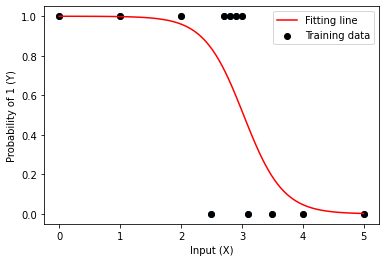

In [24]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train)

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W) + b)

plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.scatter(x_train, y_train, c="black", label="Training data")
plt.plot(X, Y, c="#ff0000", label="Fitting line")
plt.legend()

plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1]

model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)

print(model.coef_, model.intercept_)

x_test = [[4.5], [1.1]]
test_result = model.predict(x_test)
print(test_result)

[[-3.10385806]] [9.39776831]
[0 1]
